## RNN for time series

In [ ]:
# 2, 4, 6, 8
# 10, 12, 14, 16

<AxesSubplot:title={'center':'f(x) time series'}, xlabel='time', ylabel='dollars'>

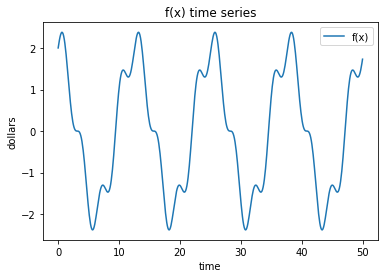

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f = lambda t: 0.5 * np.sin(2 * t) + 2*np.cos(0.5 * t)

x = np.linspace(0, 50, 500)

df = pd.DataFrame(f(x), index = x, columns = ["f(x)"])

df.plot(title = "f(x) time series", xlabel = "time", ylabel = "dollars")

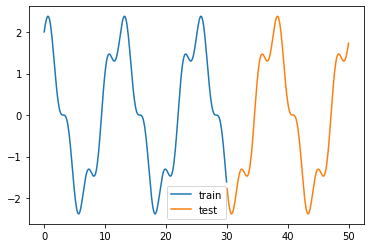

In [4]:
test_split = 200

df_train = df.iloc[: -test_split]
df_test = df.iloc[-test_split: ]

ax = plt.axes()
df_train.plot(ax = ax)
df_test.plot(ax = ax)
plt.legend(["train", "test"])

## Scale data

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_train = scaler.fit_transform(df_train)
scaled_test = scaler.transform(df_test)

scaled_train.shape, scaled_test.shape, scaled_test.min(), scaled_test.max()

((300, 1), (200, 1), 0.00011292154516773234, 0.9994100860551354)

## Time series batches

format: (batch_size, time_steps, dimensionality)

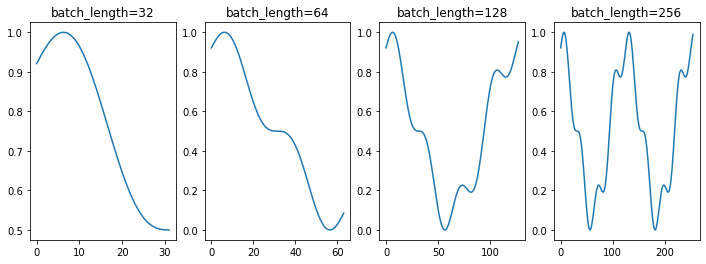

In [11]:
batch_lengths = [32, 64, 128, 256]

_, axes = plt.subplots(1, 4, figsize = (12, 4))
for batch_length, ax in zip(batch_lengths, axes):
    ax.plot(scaled_train[:batch_length])
    ax.set_title(f"{batch_length=}")

In [ ]:
#from trensorflow.keras.preprocessing.sequence import 

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
LSTM_layer = LSTM(batch_length, return_sequences = False, input_shape = (None, 1))

model